# Regression - 房價預測

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [34]:
data = pd.read_csv("./dataset/housing.csv" , header=None , delim_whitespace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [35]:
data.shape

(506, 14)

In [36]:
Y = data.iloc[:,13]
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: 13, dtype: float64

In [37]:
X=data.iloc[:,0:13]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [38]:
X.shape

(506, 13)

In [39]:
house_X_train, house_X_test, house_y_train, house_y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [40]:
scaler = preprocessing.StandardScaler().fit(house_X_train)
house_X_train = scaler.transform(house_X_train)

In [41]:
house_y_train.describe()

count    455.000000
mean      22.553187
std        9.146528
min        5.000000
25%       17.150000
50%       21.200000
75%       25.000000
max       50.000000
Name: 13, dtype: float64

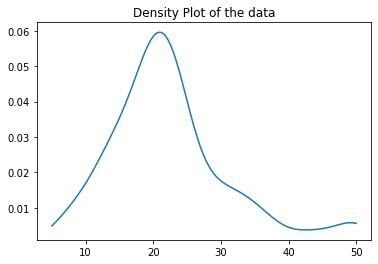

In [27]:
from scipy.stats import kde

density = kde.gaussian_kde(house_y_train)
x = np.linspace(5,50,300)
y=density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.show()

In [44]:
logdata = np.log10(house_y_train)
logdata.describe()

count    455.000000
mean       1.318353
std        0.177874
min        0.698970
25%        1.234262
50%        1.326336
75%        1.397940
max        1.698970
Name: 13, dtype: float64

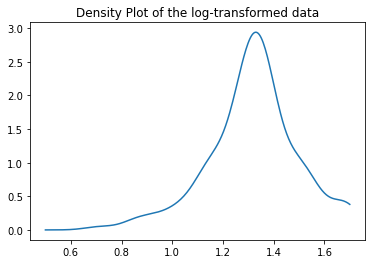

In [45]:
density = kde.gaussian_kde(logdata)
x = np.linspace(0.5,1.7,300)
y=density(x)

plt.plot(x, y)
plt.title("Density Plot of the log-transformed data")
plt.show()

In [42]:
#Build Linear regression model
model = linear_model.LinearRegression(n_jobs=-1)

# Train the model using the training sets
model.fit(house_X_train, house_y_train)

# Make predictions using the testing set
house_X_test = scaler.transform(house_X_test)
house_y_pred = model.predict(house_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(house_y_test, house_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(house_y_test, house_y_pred)))   

Coefficients: [-1.03487757  1.26805015  0.01663073  0.67043865 -2.2113605   2.47427463
 -0.01653529 -3.34870025  2.7419016  -2.04245144 -2.00119631  0.79962494
 -3.73233025]

Mean squared error: 20.544274659325737
R2 score: 0.778638658029892
